# Our implementation

This notebook first shows how to use our implementation of LDA. Then we compare our method to that of sklearn. 

In [1]:
# Libraries
import numpy as np

# Load our implemented LDA from LinearDiscriminantAnalysis.py
from LinearDiscriminantAnalysis import LDA_implemented

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")



# Load data

In [2]:

train_data = np.load("data/fashion_train.npy")
X_train, y_train = train_data[:,:784], train_data[:,-1]

test_data = np.load("data/fashion_test.npy")
X_test, y_test = test_data[:,:784], test_data[:,-1]

N_CLASSES = len(np.unique(y_train))
CLOTHING_TYPES = {0: "T-shirt/top", 
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Shirt"}


# Perform LDA

In [3]:
num_components = N_CLASSES - 1
lda = LDA_implemented(n_components=num_components)

# Only fit on training data
LDA_X_train = lda.fit_transform(X_train, y_train)
LDA_X_test = lda.transform(X_test)



LDA succesfully fitted and tranformed


In [4]:
# Pairplot of discrimnants

df_LDA_X_train = pd.concat([pd.DataFrame(LDA_X_train), pd.Series(y_train, name='target')], axis=1)
df_LDA_X_train.columns = ['LDA 1', 'LDA 2', 'LDA 3', 'LDA 4', 'target']

sns.pairplot(data=df_LDA_X_train, hue="target", corner=True)
plt.suptitle("Pairplot of Discriminants from our implementation",fontsize=24);
plt.tight_layout()

NameError: name 'sns' is not defined

# Comparison to sklearn

In [5]:
num_components = N_CLASSES - 1
LDA_sklearn = LinearDiscriminantAnalysis(n_components=num_components, solver="svd")
LDA_sklearn_X_train = LDA_sklearn.fit_transform(X_train, y_train)

df_LDA_sklearn_X_train = pd.concat([pd.DataFrame(LDA_sklearn_X_train), pd.Series(y_train, name='target')], axis=1)
df_LDA_sklearn_X_train.columns = ['LDA 1', 'LDA 2', 'LDA 3', 'LDA 4', 'target']

sns.pairplot(data=df_LDA_sklearn_X_train, hue="target", corner=True)
plt.suptitle("Pairplot of Discriminants from Sklearn",fontsize=24);
plt.tight_layout()

NameError: name 'sns' is not defined

We can see that our implementation is a mirrored version of sklearns. 

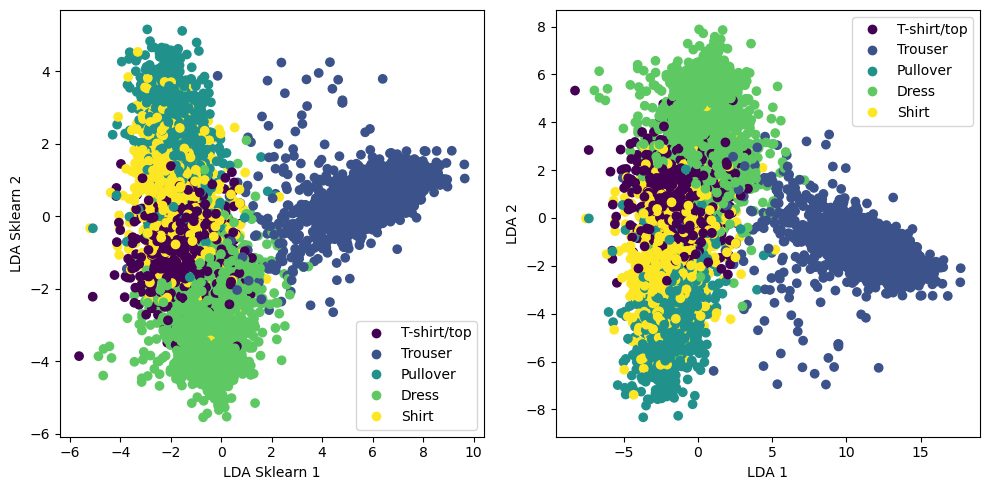

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
legend_labels = [f"{CLOTHING_TYPES[i]}" for i in range(len(CLOTHING_TYPES))]
scatter1 = ax[0].scatter(LDA_sklearn_X_train[:,0], LDA_sklearn_X_train[:,1], c=y_train)
scatter2 = ax[1].scatter(LDA_X_train[:,0], LDA_X_train[:,1], c=y_train)
ax[0].legend(handles=scatter1.legend_elements()[0], labels=legend_labels, loc='lower right')
ax[1].legend(handles=scatter2.legend_elements()[0], labels=legend_labels, loc='upper right')
ax[0].set_xlabel("LDA Sklearn 1")
ax[0].set_ylabel("LDA Sklearn 2")
ax[1].set_xlabel("LDA 1")
ax[1].set_ylabel("LDA 2")
fig.tight_layout()